# EDA and Preprocessing for credit card default prediction data

## Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import numpy as np

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os,sys
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, 
                            \ precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

 ### Import the CSV Data as Pandas DataFrame

In [81]:
df = pd.read_csv('UCI_Credit_Card.csv')

 ### Show Top 5 Records

In [59]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


### Shape of the dataset



In [7]:
df.shape

(30000, 25)

No. of rows and columns in dataset (30000,25)

### columns in dataset

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

The columns in dataset is a mix of numerical and catagorical columns

 ### Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

The datatype of columns is int or float not object

### check unique values

In [10]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

There are unique values in dataset 

### 3.1 Check Missing values

In [11]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No missing value in dataset

### Check Duplicates

In [12]:
df.duplicated().sum()

0

    No duplicates in dataset

### Check statistics of data set

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### insights 


min amount and max amount of bill_amt_columns ,and pay_amt_columns has huge difference

### renaming column names  and making adjustments so that it would be easy to code 

In [14]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [82]:
df.rename(columns = {'LIMIT_BAL': 'limit_bal', 'SEX':'sex', 'EDUCATION':'education', 'MARRIAGE':'marriage', 'AGE':'age'},inplace=True)

In [4]:
pay_columns=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
pay_amt_columns=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
bill_amt_columns=df[[ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [5]:
cat_columns=df[['limit_bal','sex','education','marriage','age','default.payment.next.month']]

## Exploring Data

,Count,Percent Split
Not Default,23364,77.88
Default,6636,22.12


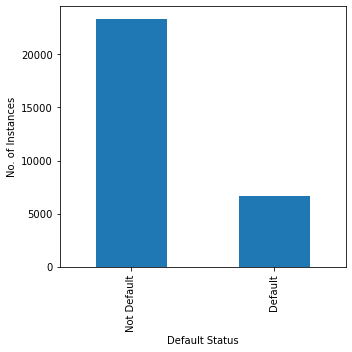

In [38]:
total_cnt = df.shape[0]

cls_cnt = df['default.payment.next.month'].value_counts()
cls_stats = pd.DataFrame ({"Count": [cls_cnt[0], cls_cnt[1]],\
                        "Percent Split" : [((cls_cnt[0] * 100.0) /total_cnt), ((cls_cnt[1] * 100.0) /total_cnt)]},
                         index=["Not Default", "Default"])
display(cls_stats)
plt.figure(figsize=(5,5))
ax = cls_cnt.plot(kind='bar')
ax.set_xlabel("Default Status")
ax.set_ylabel("No. of Instances")
ax.set_xticklabels(['Not Default', 'Default'])
#     for p in ax.patches:
#         ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+300))
plt.tight_layout()
plt.show()

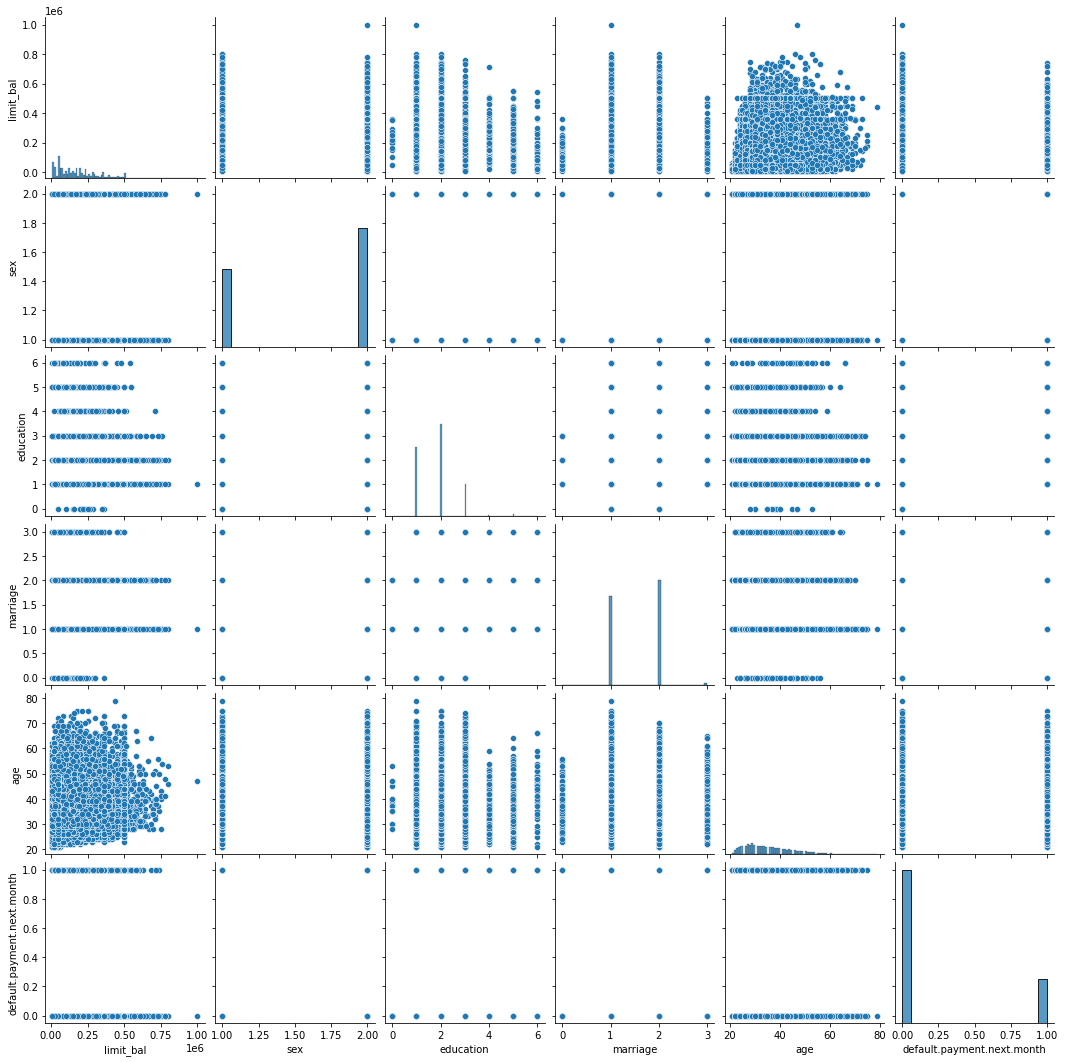

In [62]:
sns.pairplot(cat_columns)

From pairplot we can observe that age,education and marriage columns are divided in to various groups and catagories therefore 
we can drop those variables in catagorical columns which are not providing more relevent information.

Dataset has outliars. 

We can observe that most of the variables in age column have limtbal upto 0.6 approximatly.

In [44]:
 pd.value_counts(df['limit_bal']>600000)

False    29921
True        79
Name: limit_bal, dtype: int64

 maximum limit_bal is upto (1000000) of which 0.6 is 600000 and there are only 79 values above it so, we can drop these values.

<AxesSubplot:xlabel='limit_bal', ylabel='count'>

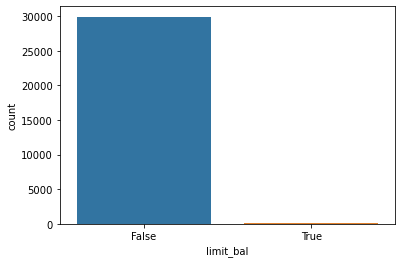

In [35]:
sns.countplot(x=df['limit_bal']>600000 )

<AxesSubplot:>

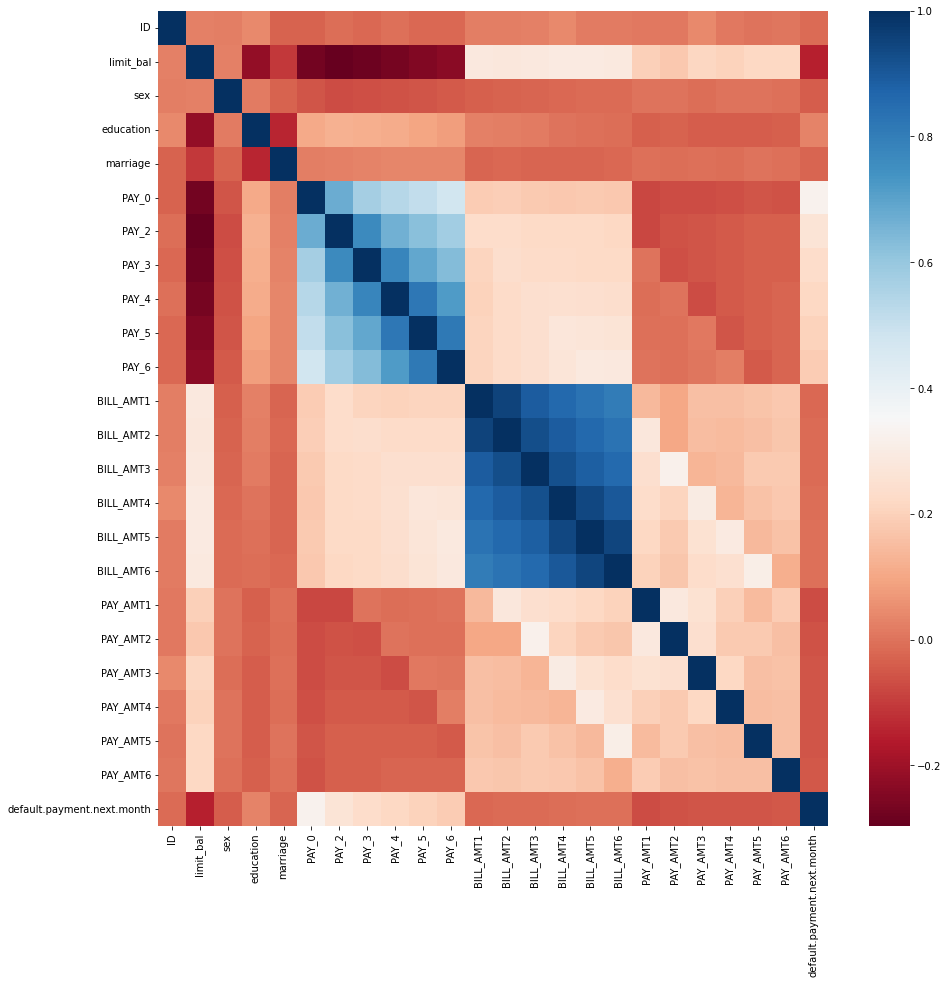

In [41]:
plt.subplots(figsize= (15, 15))
sns.heatmap(df.corr(),cmap='RdBu')

From this heatmap we can observe that bill_amt_columns are highly correlated with each other internally(default in credit 
amount increses bill amount ).

Age is negatively correlated with marriage.

Pay_columns have positive correlation and it is providing a pattern pay_0 is positively correlated with pay_2 ,pay_2 is
positively related with pay_3 and so on  (from this i could understand is that it shows if a person could not pay first 
credit amount to bank it gets added to next paymentbill and result in increase in payment status amount ).

limitbal column is negatively correlated with pay_columns (from this i could interpret is that as a person does payment of his
credit amount bill the withdrawl of that amount to pay for credit amount results in negative correlation due to withdrawl of 
amount the limitbal in person s bank account decreases and he pays with that amount which in turn increses his pay status to paid ).


In [42]:
variable_1=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

<AxesSubplot:>

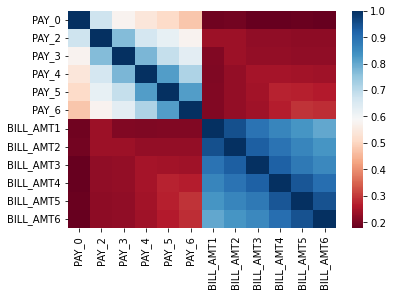

In [43]:
sns.heatmap(variable_1.corr(),cmap='RdBu')

In [44]:
variable=df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]]

<AxesSubplot:>

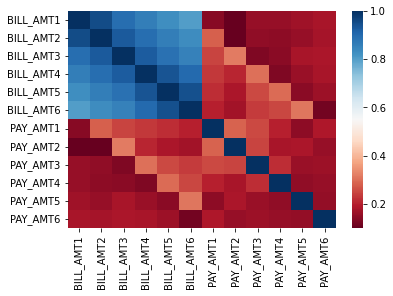

In [45]:
sns.heatmap(variable.corr(),cmap='RdBu')

In [8]:
threshold=0.8

In [9]:
def corr(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
corr(df.iloc[:,:-1],threshold)

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6'}

bill_amt,pay_5,pay_6 columns are correlated more than 80% so, we can drop some columns .

In [14]:
bins = [20,30,40,50,60,70,80]


In [15]:
df['age']=pd.cut(df['age'],bins=bins)

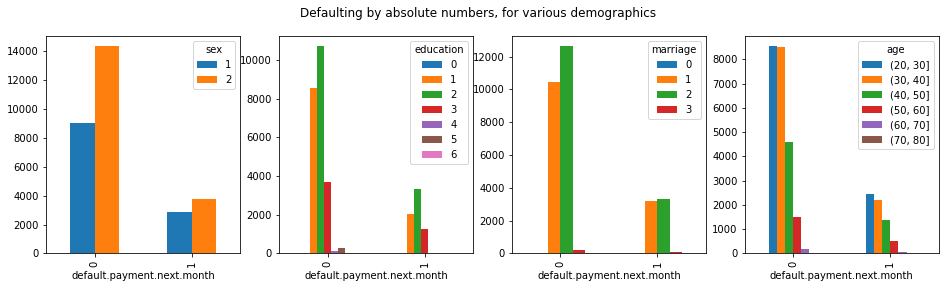

In [50]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['default.payment.next.month', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['default.payment.next.month', 'education']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['default.payment.next.month', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby(['default.payment.next.month', 'age']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

As per documentation of the dataset:

For education, we only have following
1 = graduate school; 2 = university; 3 = high school; 4 = others
We will replace 0,5,6 with 'others'

In sex 1=male, 2=female

In marriage 1=married,2=single,3=others

Distribution of Gender:
Female credit card holders are more compared to Male
Female defaulters are more compared to Male


Distribution of Marriage:
Single are holding more credit cards compared to Married and Others
Within defaulters Marital status with Others is very minimal. Married and Single have same number of defaulters


Distribution of Education:
People with education value as Graduate and University have more credit cards.


Distribution by Age:
Age 60 to 70 and Age 70 to 80 have very less credit card holders
Age 20 to 30 and 30 to 40 have more defaulters

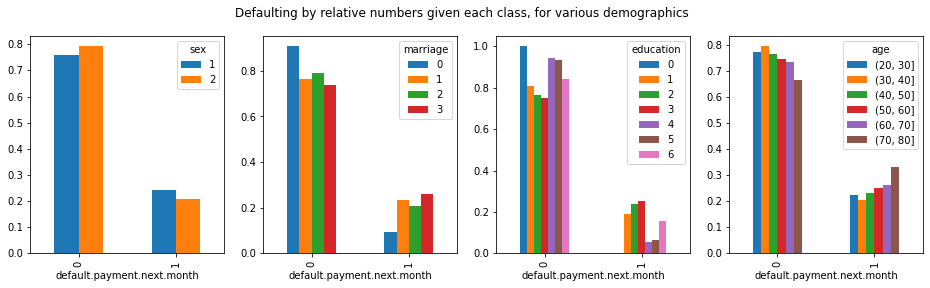

In [67]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['default.payment.next.month', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['default.payment.next.month', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['default.payment.next.month', 'education']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = df.groupby(['default.payment.next.month', 'age']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

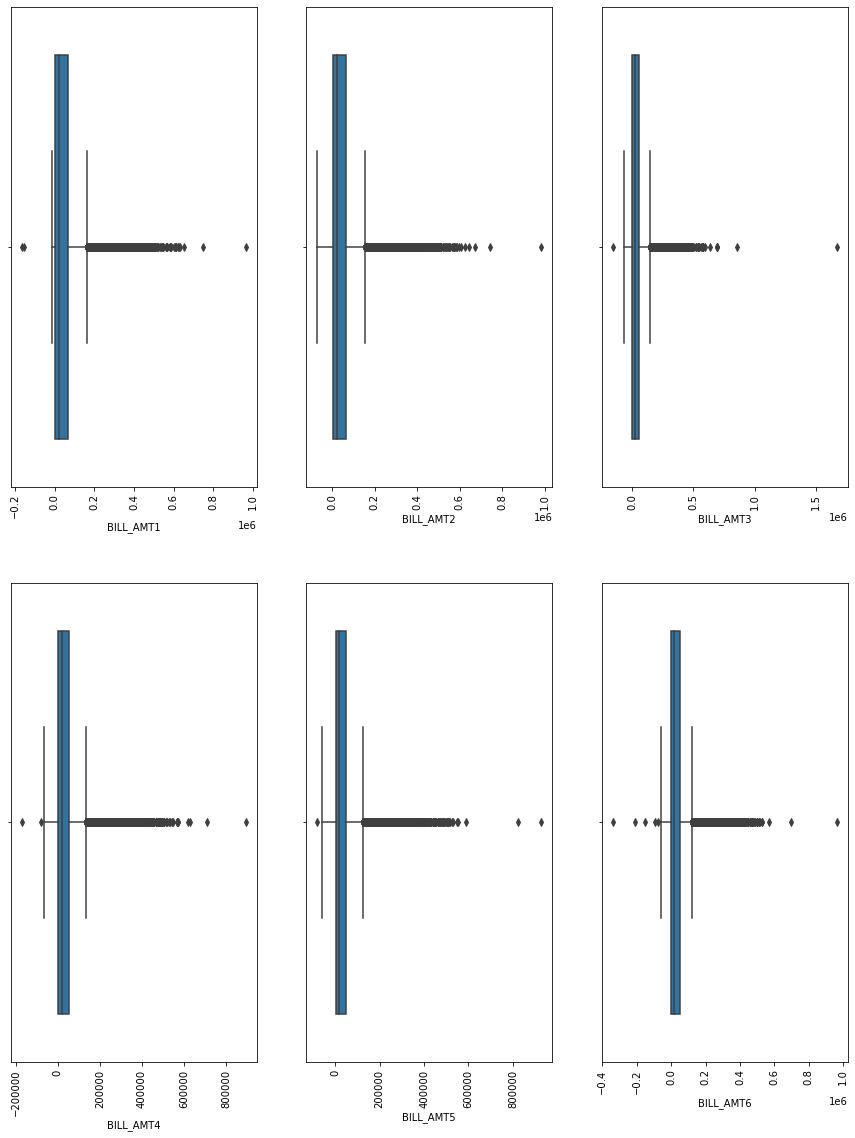

In [11]:
plt.figure(figsize = (15,30))
for i in enumerate(bill_amt_columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(i[1],hue="default.payment.next.month",data=df,orient="v")
    plt.xticks(rotation = 90)

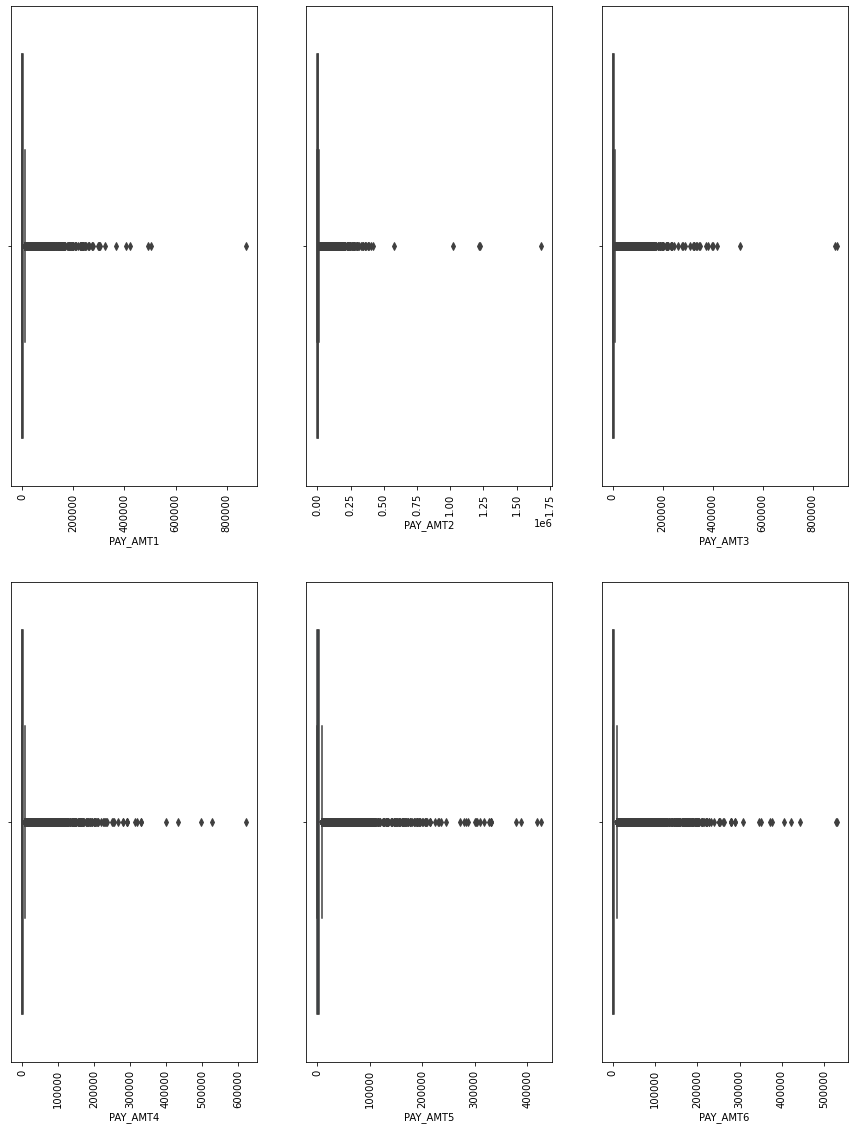

In [68]:
plt.figure(figsize = (15,30))
for i in enumerate(pay_amt_columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(i[1],hue="default.payment.next.month",data=df,orient="v")
    plt.xticks(rotation = 90)

As it can be observed that data is infested with outliers(by the logic of extreme values beyond 1.5*IQR),
but since removing them would cost lot of valuable loss of information.We decided not to treat them as ouliers.

## Data Transformation

In [83]:
index_names = df[ df['limit_bal'] >600000 ].index
# drop these row indexes from dataFrame
df.drop(index_names, inplace = True)
  
df

,ID,limit_bal,sex,education,marriage,age,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [18]:
df.shape

(29921, 25)

In [19]:
df.columns

Index(['ID', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [84]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school']= (df['education']==3).astype('int')
df['others']= (df['education']==4).astype('int')
df['others']= (df['education']==5).astype('int')
df['others']= (df['education']==6).astype('int')
df['others']= (df['education']==0).astype('int')
df.drop('education',axis=1,inplace=True)

In [85]:
df['male'] = (df['sex']=='M').astype('int')
df.drop('sex',axis=1,inplace=True)


df['married'] = (df['marriage']==1).astype('int')
df['single'] = (df['marriage']==2).astype('int')
df['na'] = (df['marriage']==3).astype('int')
df['na'] = (df['marriage']==0).astype('int')
df.drop(['marriage'],axis=1,inplace=True)


In [46]:
df.head()

,ID,limit_bal,age,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default.payment.next.month,grad_school,university,high_school,others,male,married,single,na
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,1,0,1,0,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,2000.0,1,0,1,0,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,5000.0,0,0,1,0,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1000.0,0,0,1,0,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,679.0,0,0,1,0,0,0,1,0,0


In [15]:
threshold=0.7
def corr(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr(df.iloc[:,:-1],threshold)

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'single'}

 ### dropping the multicollinearity variables 

In [86]:
df.drop(df.columns[[0,5,6,7,8,11,12,13,14,15,26]], axis=1, inplace=True)
  
df

,limit_bal,age,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,grad_school,university,high_school,others,married,single,na
0,20000.0,24,2,2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0
1,120000.0,26,-1,2,2682.0,1725.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0,1,0
2,90000.0,34,0,0,29239.0,14027.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0,1,0
3,50000.0,37,0,0,46990.0,48233.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1,0,0
4,50000.0,57,-1,0,8617.0,5670.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,188948.0,192815.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1,0,1,0,0
29996,150000.0,43,-1,-1,1683.0,1828.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1,0,0,1,0
29997,30000.0,37,4,3,3565.0,3356.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0,0,0,1,0
29998,80000.0,41,1,-1,-1645.0,78379.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1,0,1,0,0


In [87]:
df.drop(df.columns[[15,17]], axis=1, inplace=True)
  
df

,limit_bal,age,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,grad_school,university,high_school,married,na
0,20000.0,24,2,2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0
1,120000.0,26,-1,2,2682.0,1725.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
2,90000.0,34,0,0,29239.0,14027.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
3,50000.0,37,0,0,46990.0,48233.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,1,0
4,50000.0,57,-1,0,8617.0,5670.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,188948.0,192815.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,0,1,1,0
29996,150000.0,43,-1,-1,1683.0,1828.0,3526.0,8998.0,129.0,0.0,0.0,0,0,0,1,0,0
29997,30000.0,37,4,3,3565.0,3356.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0,1,0,0,0
29998,80000.0,41,1,-1,-1645.0,78379.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0,0,1,1,0


In [49]:
df.columns

Index(['limit_bal', 'age', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'grad_school', 'university',
       'high_school', 'married', 'na'],
      dtype='object')

In [17]:
numerical_columns=df[['limit_bal', 'age', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'BILL_AMT2','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']]

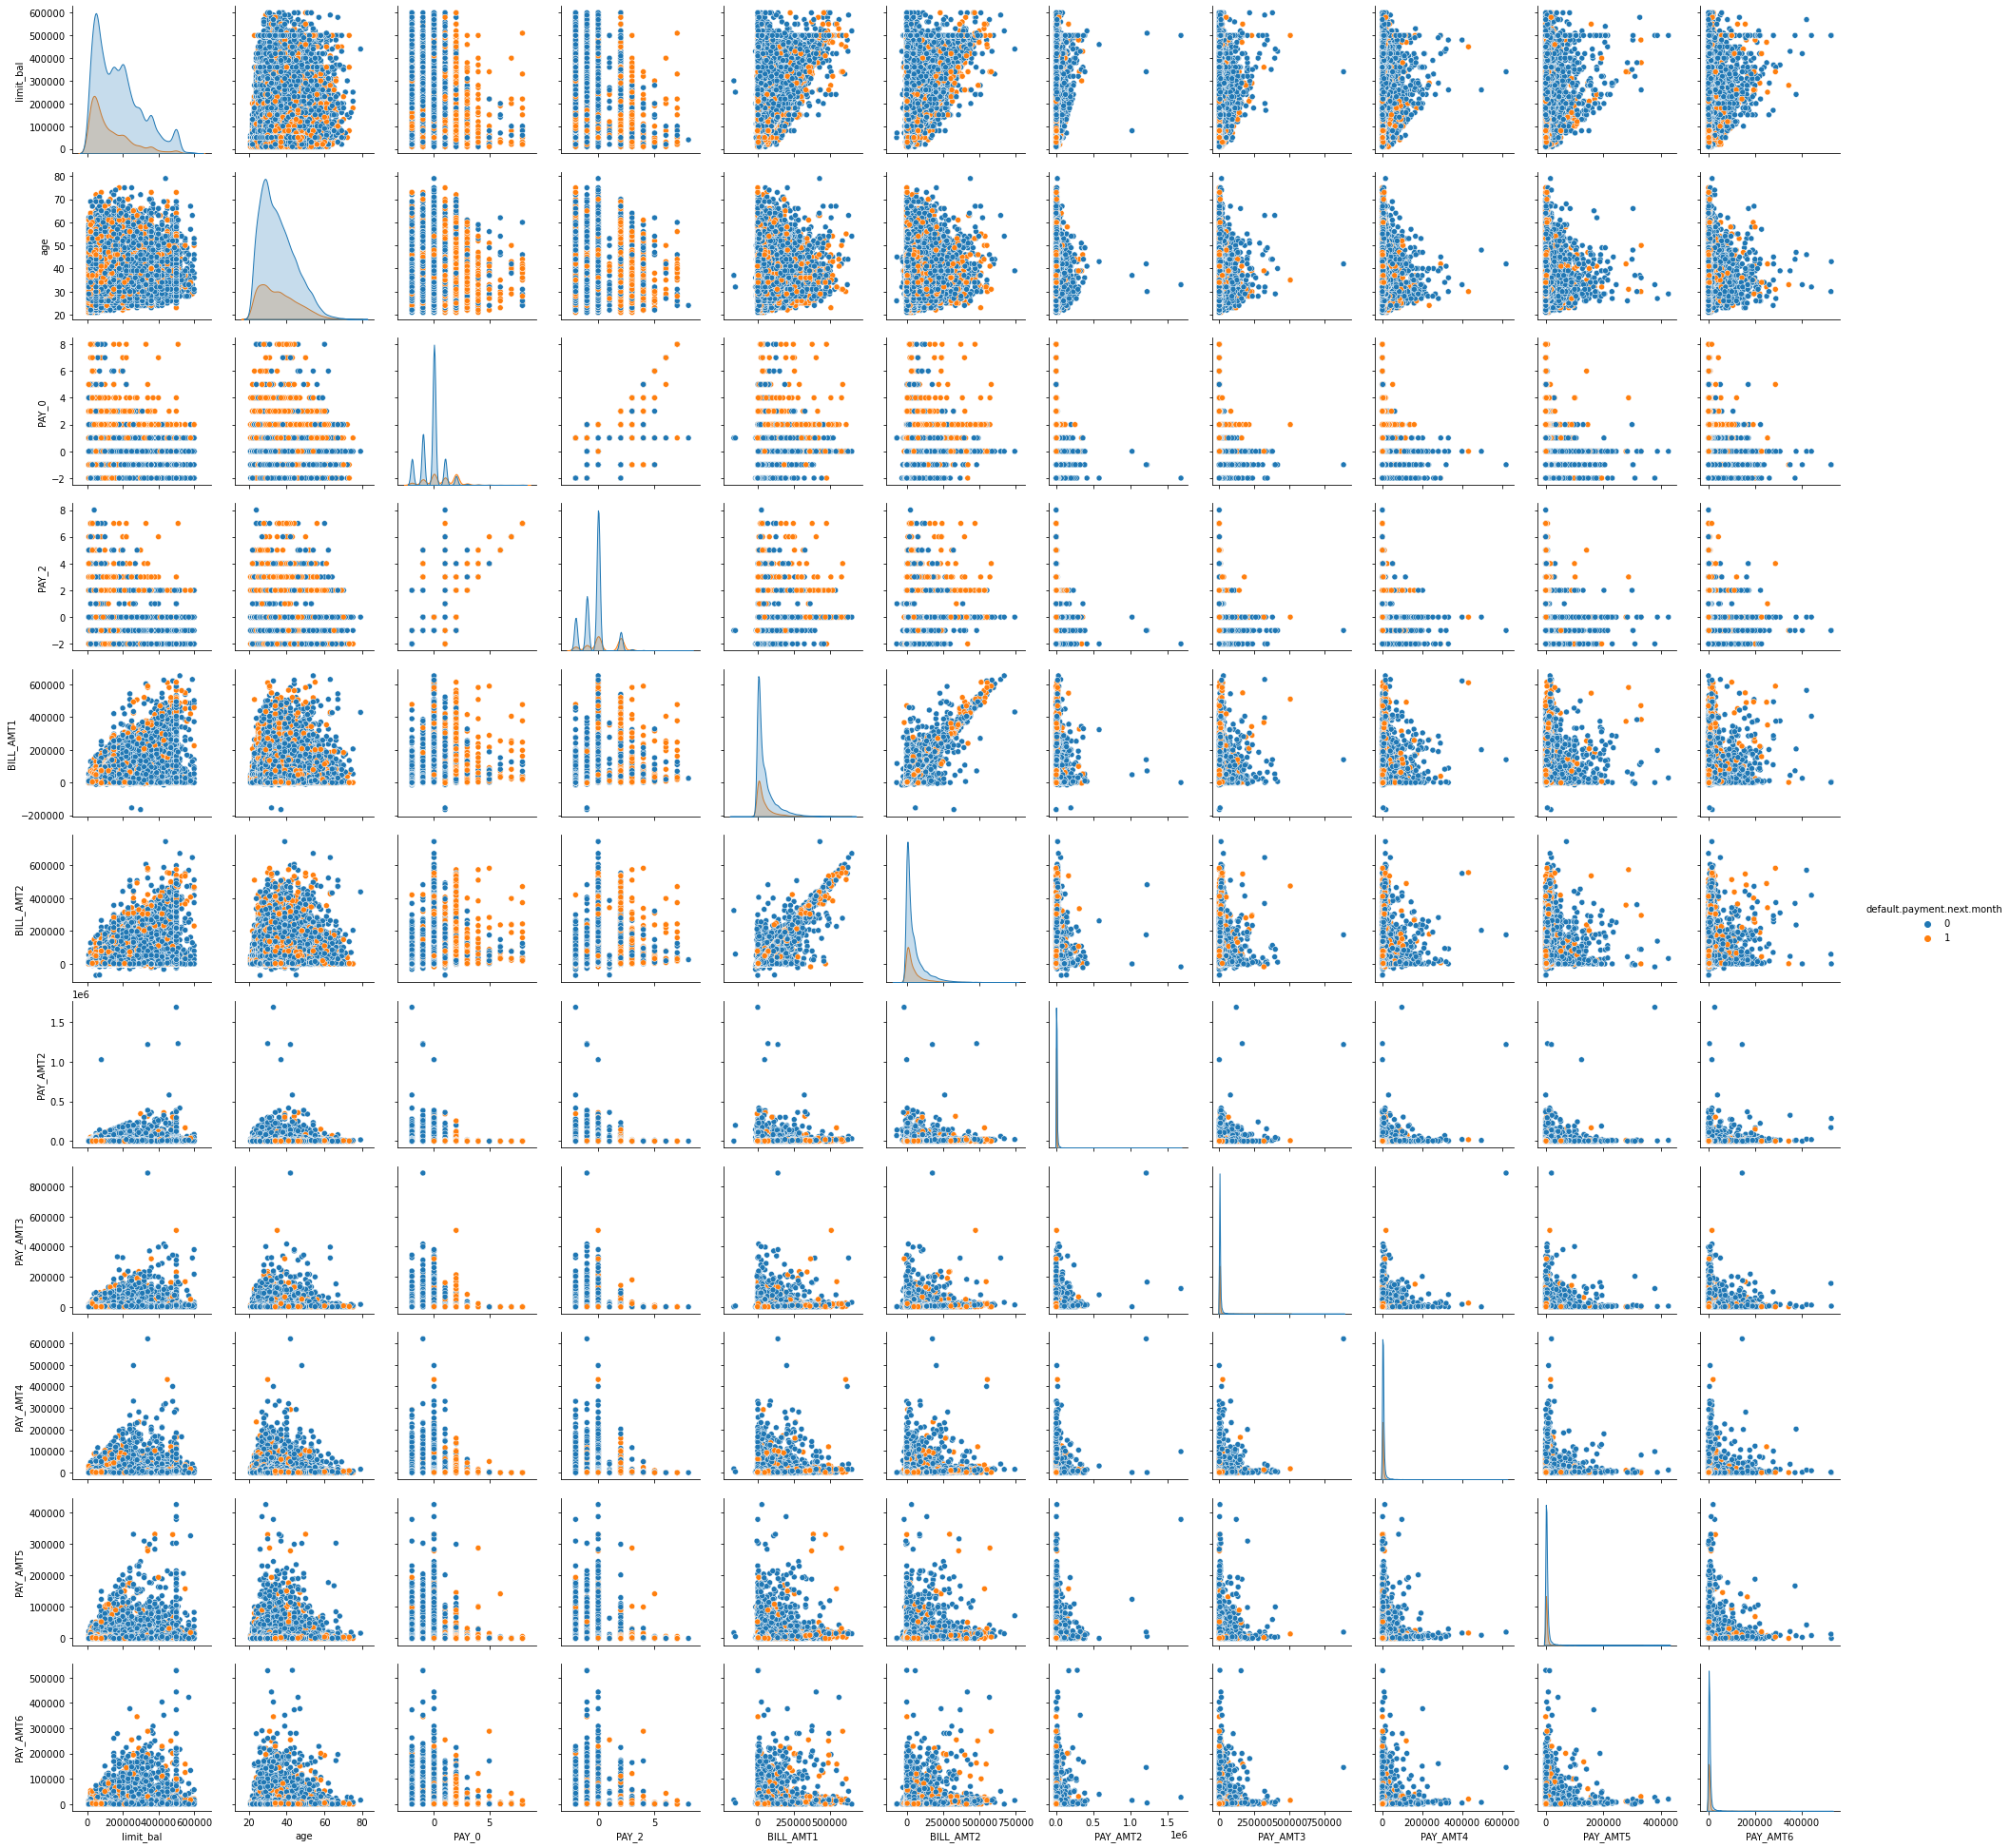

In [18]:
sns.pairplot(numerical_columns, hue = "default.payment.next.month")

### Standardisation

In [88]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [89]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
   
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
       


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
       

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
              
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
       

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list)), columns=['Model Name'])
        
    return report

In [90]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [91]:
X,y = (df.drop('default.payment.next.month',axis=1),df['default.payment.next.month'])

### Imputing values in Standard scaler

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [93]:
pipeline=Pipeline(steps= [("standard_scaler",StandardScaler())])

In [94]:
data= pipeline.fit_transform(X)

In [16]:
report_const = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9971
- Precision: 0.9981
- Recall: 0.9961
- Roc Auc Score: 0.9978
----------------------------------
Model performance for Test set
- Accuracy: 0.8222
- F1 score: 0.4845
- Precision: 0.6485
- Recall: 0.3867
- Roc Auc Score: 0.6645


Decision Tree
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9972
- Precision: 0.9998
- Recall: 0.9946
- Roc Auc Score: 0.9973
----------------------------------
Model performance for Test set
- Accuracy: 0.7307
- F1 score: 0.4108
- Precision: 0.3895
- Recall: 0.4346
- Roc Auc Score: 0.6234


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8222
- F1 score: 0.4740
- Precision: 0.6962
- Recall: 0.3594
- Roc Auc Score: 0.6572
----------------------------------
Model performance for Test set
- Accuracy: 0.8287
- F1 score: 0.4893
- Precision: 0.6877
- Recall: 0.3797
- Roc Auc Score: 0.6661


Logistic Regression
Model performance for Training 

### Imputing values in robust scaler then checking model performanse

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
pipeline_1=Pipeline(steps= [("robust_scaler",RobustScaler())])

In [19]:
data= pipeline_1.fit_transform(X)

In [53]:
report_data = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9972
- Precision: 0.9976
- Recall: 0.9968
- Roc Auc Score: 0.9981
----------------------------------
Model performance for Test set
- Accuracy: 0.8229
- F1 score: 0.4894
- Precision: 0.6488
- Recall: 0.3929
- Roc Auc Score: 0.6671


Decision Tree
Model performance for Training set
- Accuracy: 0.9987
- F1 score: 0.9972
- Precision: 0.9998
- Recall: 0.9946
- Roc Auc Score: 0.9973
----------------------------------
Model performance for Test set
- Accuracy: 0.7163
- F1 score: 0.3979
- Precision: 0.3674
- Recall: 0.4339
- Roc Auc Score: 0.6140


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8222
- F1 score: 0.4740
- Precision: 0.6962
- Recall: 0.3594
- Roc Auc Score: 0.6572
----------------------------------
Model performance for Test set
- Accuracy: 0.8287
- F1 score: 0.4893
- Precision: 0.6877
- Recall: 0.3797
- Roc Auc Score: 0.6661


Logistic Regression
Model performance for Training 

Scaling the data using Robust scaler
Since most of the independent variables are not normally distributed we cannot use Standardscaler and most of the data is infused with outliars.also, both the models are giving almost same accuracy.

### Hyperparameter Tuning and Model Selection

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
params= {
     'Gradient Boosting': {'learning_rate':[0.01,0.02,0.03],
                          'n_estimators' :[100,500,1000],
                          },
    
     'AdaBoost Classifier': {'learning_rate':[0.01,0.02,0.03],
                             'n_estimators' :[100,500,1000]
                            },
    
     'Random Forest':{'n_estimators':[20,60,100,120],
                      'max_features' :['auto','sqrt','log2'],
                      'max_depth' :[10,50,100],
                      'max_samples': [0.5,0.75,1.0]
                     },
    
     'Decision Tree': {'max_depth':(10,50,100),
              'criterion':('gini','entropy'),
              'max_features':('auto','sqrt','log2'),
              'min_samples_split':(2,4,6)
                      }
}

In [97]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()    
}

In [74]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [98]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    (X_train, X_test, y_train, y_test,models,params)
    
      
   
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        param=params[list(models.keys())[i]]
        
        rf = RandomizedSearchCV(estimator=model,
                                 param_distributions=param,
                                  cv=3,
                                  n_jobs=-1)
        rf.fit(X_train, y_train)
        
        model.set_params(**rf.best_params_)
        model.fit(X_train, y_train)
       # model.fit(X_train, y_train) # Train model
    

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
       


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
       

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
              
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
       

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list)), columns=['Model Name'])
        
    return report

In [99]:
report = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 0.8430
- F1 score: 0.5387
- Precision: 0.7813
- Recall: 0.4111
- Roc Auc Score: 0.6890
----------------------------------
Model performance for Test set
- Accuracy: 0.8266
- F1 score: 0.4846
- Precision: 0.6768
- Recall: 0.3774
- Roc Auc Score: 0.6639


Decision Tree
Model performance for Training set
- Accuracy: 0.8324
- F1 score: 0.5224
- Precision: 0.7165
- Recall: 0.4111
- Roc Auc Score: 0.6822
----------------------------------
Model performance for Test set
- Accuracy: 0.8152
- F1 score: 0.4683
- Precision: 0.6188
- Recall: 0.3766
- Roc Auc Score: 0.6564


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8208
- F1 score: 0.4625
- Precision: 0.6983
- Recall: 0.3457
- Roc Auc Score: 0.6514
----------------------------------
Model performance for Test set
- Accuracy: 0.8291
- F1 score: 0.4825
- Precision: 0.6974
- Recall: 0.3689
- Roc Auc Score: 0.6624


AdaBoost Classifier
Model performance for Training 

### Final model giving the most accuracy and roc_auc score is random forest classifier